<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/10_AprendizajeNoSupervisado/aprendizaje_no_supervisado.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Aprendizaje no supervisado

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Reducción de dimensionalidad

Otros algoritmos de aprendizaje no supervisado muy utilizados son los algoritmos de reducción de dimensionalidad.
Estos algorítmos pueden ser muy útiles para diversos tipos de problema: visualizar datos de gran dimensionalidad, para filtrar ruido, para realizar extración e ingeniería de datos.



### Principal Componet Analysis: PCA

Este metodo no supervisado para la reducción de dimensionalidad es muy flexible y da buenos resultados para la mayoría de los tratamientos. Vamos a trabajar con la introducción brindada por la librería [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)



(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

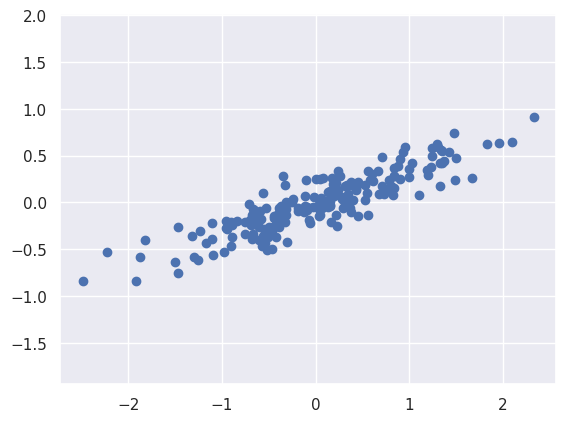

In [ ]:
#generamos datos sintéticos: (de mentira :p)
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Vemos una relación lineal entre los datos.

Para realizar una reducción de dimensionalidad este método usa la matriz de covarianza entrre las variables y la descompone en una matríz autovectores para entender como explicar la relación entre los puntos con los vectores fundamentales.

La matríz de covarianza es la matriz donde los elementos i,j de la matriz representan la covarianza entre la variable i y la variabe j.


Algunas propiedades para tener encuenta sobre la covarianza:

* La covarianza de un vector contra si mismo es igual a su varianza.
* Cada elemento de la diagonal principal representa la varianza de la variable correspondiente
* La matriz de covarianza es simétrica


- PCA:
Evalua la relación entre variables utilizando la matríz de covarianza y entiende los principales componentes que describe nuestros datos a través de sus autovalores. El peso que tiene cada autovector para describir la naturaleza de los datos es dado por su autovalor asociado.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


Autovectores del Subespacio: que me van a permitir reconstruir todo el espacio, con esta matriz puedo hacerlo

(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

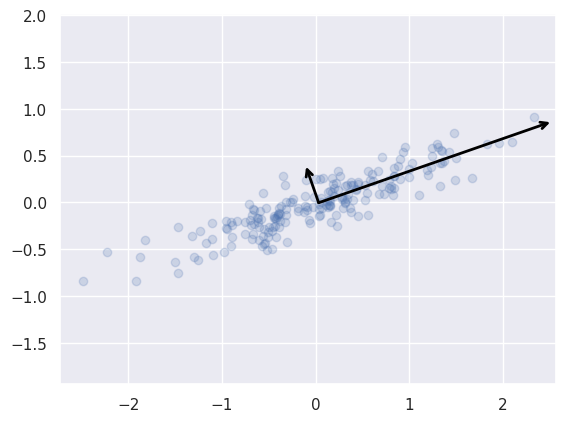

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

Estos Vectores son los minimos necesarios para describir el subespacio de los datos. La longitud de cada Autovector esta relacionado con la dispersión de los datos. A mayor dispersión vamos a tener mayor dispersión.
El autovalor va a ser la magnitud del autovector que describe este conjunto de datos.

#### Implementacion: de R2 a R

Cuando tenemos un dataset de alta dimensionalidad, para reducirlo, PCA va a eliminar los componentes principales de menor influencia para mantener la maxima cantidad de varianza posible.

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


si aplicamos la reducción de las 2 dimensiones que teniamos anteriormente a 1 lo que obtendremos sobre la data original:

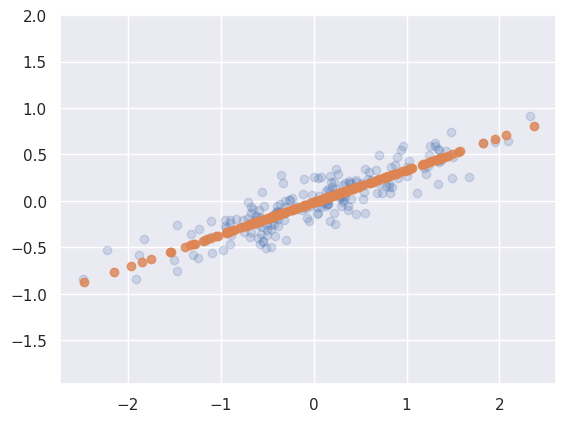

In [ ]:
#vemos que pasa en el gráfico.
X_new = pca.inverse_transform(X_pca) #para graficarlo en 2 dimensiones
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los datos q tenemos dispersos mas en x que en y podemos explicarlos con una linea reduciendo las dimensiones. A veces la información se uede explicar con menos recursos.

#### Paso a paso con algebra lineal
* Normalizamos los datos
<center><img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Standardization.png width=200></center>

* obtenemos matriz de covarianza.
Ejemplo R3
<center><img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png width=200></center>
los valores positivos van a indicar relaciones positivas (crecen o decrecen de la misma manera) y viceversa.
* Obtenemos autovectores y autovalores para entender los componentes principales y su importancia. Si recordamos un poco de Álgebra los autovalores son los vectores principales que explican un espacio. De otra manera, son los mínimos vectores necesarios que al combinarlos linealmente pueden recrear todo el subespacio. En nuetro caso todo el dataset. Estos vectores no estan correlacionados entre sí. Aquellos autovectores con autovalores más grandes son los más determinantes del subespacio. Los que poseen mayor información o **explican la mayor cantidad de varianza**. Este último concepto es importante: Relacionamos información con varianza ya que a mayor dispersión de datos estamos teniendo mayor cantidad de información. Si los datos estan muy compactos en pocos valores, o sea poseen poca dispersión, estamos teniendo poca información. Pocos valores.
La idea detras de PCA es eliminar esos componentes que no otorgan información significativa sobre nuestros datos. En el caso visto más arriba vemos que el autovector de menor magnitud es aquel que es eliminado para hacer la reducción de dimensionalidad y nos quedamos con el mayor para recrear nuestro subespacio con una dimensión menor.



In [ ]:
#Normalizamos solo extrayendo la media por fines prácticos (va a estar centrado en 0)
X_meaned = X - np.mean(X , axis = 0)
# matriz de covarianza
cov_mat = np.cov(X_meaned , rowvar = False)
#autovalores y autovectore de dicha matriz
autovalores, autovectores = np.linalg.eigh(cov_mat)
#ordenamos los autovalores de manera descendiente
sorted_index = np.argsort(autovalores)[::-1]
sorted_autovalores = autovalores[sorted_index]

#Ordenamos los autovectores en relación a los autovalores
sorted_autovalores = autovectores[:,sorted_index]

# Elegimos los primeros n valores donde n es la dimensión de nuestro nuevo subespacio

n_dim = 1
autovalores_subset = sorted_autovalores[:,0:n_dim]

# por último hacemos una transformación lineal de los datos que tenemos utilizando el producto punto
X_redux = np.dot(autovalores_subset.transpose(),X_meaned.transpose()).transpose()

In [ ]:
X_redux.shape

(200, 1)

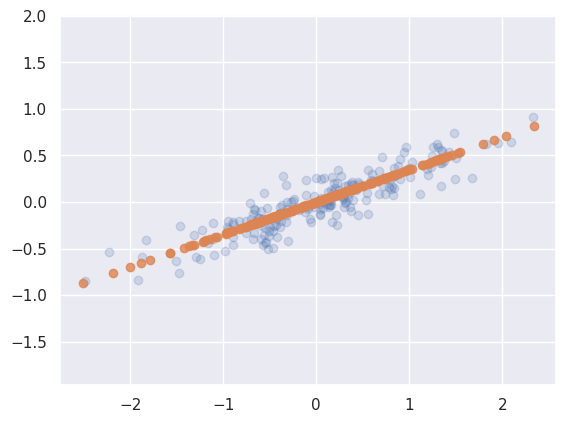

In [ ]:
#lo vuelvo a transformar a 2 dimensiones para visualizarlo
X_redux_inv = np.dot(X_redux, autovalores_subset.T)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_redux_inv[:, 0], X_redux_inv[:, 1], alpha=0.8)
plt.axis('equal');

### PCA para visualización

Para este caso vamos a utilizar un dataset que contiene imagenes de números escritos a mano y un valor target que representa el verdadero número que se trato de escribir a mano.


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

vemos que tenemos un dataset de 1797 filas o samples con 64 variables, si transformamos las imagenes de 8x8 en un vector de 1 dimensión de 64 valores. Donde cada fila sería uno de los números

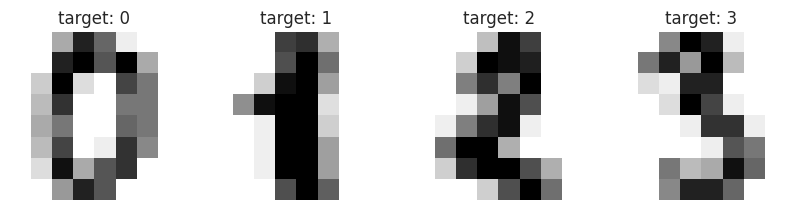

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("target: %i" % label)

Reducimos esa matríz a 2 dimensiones y graficamos

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Graficamos cada foto (1797) representada en un punto en un espacio de 2 dimensiones

<ipython-input-15-edf2e7f71a54>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('jet', 10))


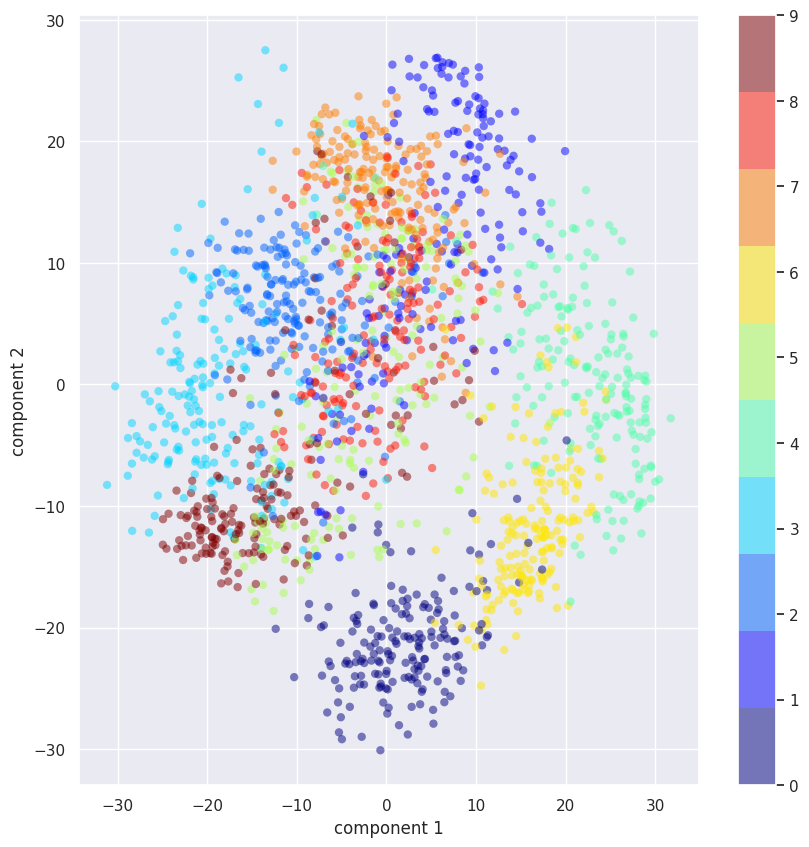

In [ ]:
plt.subplots(1,1, figsize=(10, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
# Representar en 3 dimensiones este dataset.

### Limitaciones

PCA (Análisis de Componentes Principales) es una técnica estadística que se usa para reducir la dimensionalidad de los datos. Lo hace encontrando las "direcciones" (componentes principales) en las que los datos varían más, y proyectando los datos en esas direcciones.

PCA basa su método en propiedades del espacio euclidiano propias del álgebra que manejamos. Esto genera que no pueda entender relaciones de espacios no euclidianos o datos con relaciones no lineales.
Para esto existen otros métodos.


Esto significa:

Espacio euclidiano:

PCA asume que los datos están en un espacio "normal", donde las distancias y direcciones siguen las reglas geométricas clásicas (como en el plano cartesiano típico).

Relaciones lineales:

PCA solo captura relaciones lineales entre variables. Por ejemplo, si hay una relación clara entre dos variables en forma de recta, PCA la puede detectar bien.

No detecta relaciones no lineales:

Si los datos están relacionados de forma curva o compleja (por ejemplo, en forma de espiral, círculo, u otras geometrías más raras), PCA no es capaz de "entender" esa estructura. Al proyectarlos linealmente, pierde mucha información importante.



### Reducción de dimensionalidad: TSNE y UMAP

Para salir del espacio euclideano podemos utilizar estos dos extendidos métodos para reducir dimensionalidad.

t-SNE ([t-distributed Stochastic Neighbor Embedding](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf))


Este método llega para resolver el problema que tiene PCA para trabajar con espacios no euclideanos que no podemos abarcar con Álgebra lineal.
Por ende es más complejo que PCA y vamos a tocar los conceptos principales unicamente.

t-SNE trabaja en primer lugar calculando la distribución de probabilidad que representa similaridad entre puntos vecinos. Una distribución que responde a que tan probable es que elija este otro punto como vecino. Esta distribución el modelo la supone Gauseana.

<center><img src=https://miro.medium.com/max/1400/0*j6P77qstfwQ6mkT8.png width=500></center>

<center><img src=https://miro.medium.com/max/1400/0*Afr8xsKrl6dwZ10Q.png width=500></center>

**Cómo realiza entonces la reducción de dimensionalidad**
Al encontrar distribuciones parecidas entre distintos grupos de vecinos (sí, es una clusterización) el modelo va a tratar de unirlos en una nueva distribución de probabilidad que le permita deshacerse de una de las dimensiones que describen a los datos. La nueva distribución que utiliza este método es *T de student*. De aquí el nombre.

Este proceso se optimiza iterativamente para encontrar los mejores grupos y las mejores distribuciones que los expliquen. Para esto se utiliza una distancia estadística muy extendida como métrica en machine learning conocida como [divergencia Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

In [ ]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
# import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

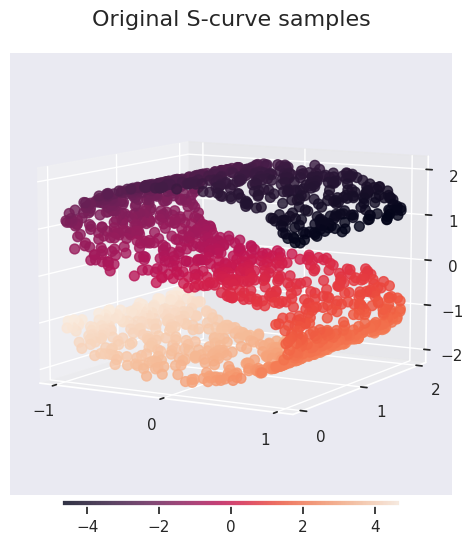

In [ ]:
#recreamos un espacio no euclideano
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


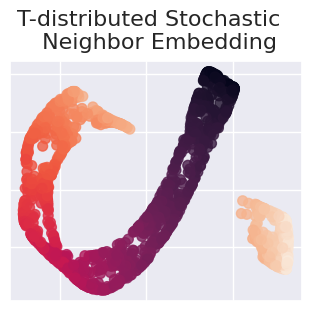

In [ ]:
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

In [ ]:
#Ejercicio: probar pca sobre este dataset sintético


In [ ]:
!pip install umap-learn

### limitaciones de t-SNE
- Este método no escala bien de manera robusta y rápida. Utiliza grandes cantidades de memoria si tenemos demasiados datos.
- tSNE no preserva la estructura global. Lo cual significa que representa bien cada cluster que encontró en relación a sus componentes pero no puede recrear de manera eficiente la relación entre clusters a la hora de reducir dimensiones.



### UMAP

Para atacar esas limitaciones aparece UMAP.
El principio que utiliza UMAP es similar al método anterior. Busca cluster por similitud y trata de encontrar distribuciones conjuntas en espacios de menor dimensión.
Sin embargo es mucho más potente y eficiente gracias a pequeñas diferencias como la utilización de otra función de costa y de otras distribuciones de probabilidad. Tampoco realiza una normalización como lo hace t-SNE. Hoy en día es mas extendido el uso de UMAP sin embargo t-SNE sigue siendo de gran utilidad para visualizaciónes de espacios en menores dimensiones.

In [ ]:
from umap import UMAP
import plotly.express as px

features = S_points

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=S_color, labels={'color': 'class'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=S_color, labels={'color': 'class'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
